In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime

In [8]:
# cargando data
df = pd.read_csv('https://storage.googleapis.com/datasets-academy/00%20Databits/Marketing_Analytics/ventas.csv', sep=';')
df.head()

,date,time,transaction,quantity,item
0,30/10/2019,9:58:11,1,1,Bread
1,30/10/2019,10:05:34,2,2,Scandinavian
2,30/10/2019,10:05:34,2,3,Scandinavian
3,30/10/2019,10:07:57,3,1,Hot chocolate
4,30/10/2019,10:07:57,3,1,Jam


In [5]:
# tamaño de df
df.shape

(21293, 5)

In [6]:
# revisar nulos
df.isnull().sum()

date           0
time           0
transaction    0
quantity       0
item           0
dtype: int64

In [16]:
# frecuencia de compras por hora
df['horas'] = pd.to_datetime(df['time']).dt.hour
df

,date,time,transaction,quantity,item,horas
0,30/10/2019,9:58:11,1,1,Bread,9
1,30/10/2019,10:05:34,2,2,Scandinavian,10
2,30/10/2019,10:05:34,2,3,Scandinavian,10
3,30/10/2019,10:07:57,3,1,Hot chocolate,10
4,30/10/2019,10:07:57,3,1,Jam,10
...,...,...,...,...,...,...
21288,9/4/2020,14:32:58,9682,2,Coffee,14
21289,9/4/2020,14:32:58,9682,2,Tea,14
21290,9/4/2020,14:57:06,9683,2,Coffee,14
21291,9/4/2020,14:57:06,9683,2,Pastry,14


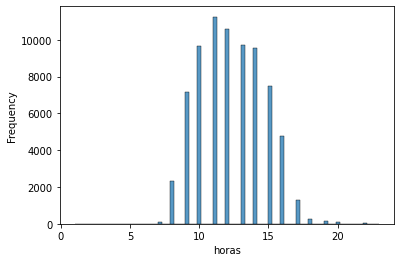

In [35]:
# graficar compras por hora
sns.histplot(df['horas'], stat='frequency')

In [36]:
# frecuencia de compras por dia de la semana
df['dias'] = pd.to_datetime(df['date']).dt.dayofweek
df

,date,time,transaction,quantity,item,horas,dias
0,30/10/2019,9:58:11,1,1,Bread,9,2
1,30/10/2019,10:05:34,2,2,Scandinavian,10,2
2,30/10/2019,10:05:34,2,3,Scandinavian,10,2
3,30/10/2019,10:07:57,3,1,Hot chocolate,10,2
4,30/10/2019,10:07:57,3,1,Jam,10,2
...,...,...,...,...,...,...,...
21288,9/4/2020,14:32:58,9682,2,Coffee,14,4
21289,9/4/2020,14:32:58,9682,2,Tea,14,4
21290,9/4/2020,14:57:06,9683,2,Coffee,14,4
21291,9/4/2020,14:57:06,9683,2,Pastry,14,4


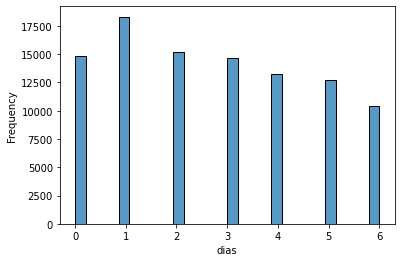

In [37]:
# graficar compras por hora
sns.histplot(df['dias'], stat='frequency')

# creando matriz de transacciones


In [40]:
# agrupar total de items por cada transaccion 
df_transacciones = df.groupby(['transaction','item'])['quantity'].sum()
df_transacciones


transaction  item         
1            Bread            1
2            Scandinavian     5
3            Cookies          1
             Hot chocolate    1
             Jam              1
                             ..
9682         Tacos/Fajita     2
             Tea              2
9683         Coffee           2
             Pastry           2
9684         Smoothies        2
Name: quantity, Length: 19640, dtype: int64

In [53]:
# pivotear tabla
df_transacciones = df_transacciones.unstack(level=1).fillna(0)
df_transacciones.head()

item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,NONE,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# dejar en binario si compra o no compra
def compra_binaria(x):
    if x>= 1:
        return 1
    else:
        return 0


In [55]:
df_transacciones_final = df_transacciones.applymap(compra_binaria)
df_transacciones_final.head()

item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,NONE,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# aplicar apriori


In [60]:
# productos mas vendidos 
frequent_itemsets = apriori(df_transacciones_final, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
2,0.475081,(Coffee)
0,0.324940,(Bread)
9,0.141643,(Tea)
1,0.103137,(Cake)
10,0.089393,"(Bread, Coffee)"
7,0.085510,(Pastry)
6,0.079005,(NONE)
8,0.071346,(Sandwich)
5,0.061379,(Medialuna)
4,0.057916,(Hot chocolate)


In [66]:
# crear reglas de asociacion
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.00535,1.109667
1,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.00535,1.012717


# conclusiones
* Los top 5 productos o combinaciones de productos son:
    - coffee
    - bread
    - tea
    - cake
    - bread, coffee
* coffee y cake ocurren 1.10 veces, por lo que tienen una relación positiva
* 52% de los clientes que compran cake llevan coffee
* 11% de los clientes que compran coffee llevan cake
